In [165]:
using LaTeXStrings, Interpolations
using Plots
pyplot();


In [145]:
using Revise
includet("Chebyshev.jl")
#include("Rust_Zurcher.jl")
using .Chebyshev

# Exercise 7 [L5]: Function approximation

Consider the function
$$
f(x) = min \{max\{-1,4(x-0.2\},1\}
$$


### 1. The ex ante code contains an example of how well linear interpolation can approximate this function. Re-do the analysis with: 
<ol type ="a">
<li> Cubic spline (use scipy.interpolate.CubicSpline) </li>
<li> Regression with regular polynomials of 4th order</li>
<li> Regression with Chebyshev polynomials (see Chebyshev.py) </li>
</ol>


Setup


In [146]:
f(x) = min(max(-1,4*(x-0.2)),1)


interval = [-1,1]
N_known = 10      # Number of known points
N_true = 1000     # Number of true points
N = 50            # Number of points for interpolation


x_true = LinRange(interval[1],interval[2],N_true)
f_true = f.(x_true)


G = LinRange(interval[1],interval[2],N)


x_known = LinRange(-0.8,0.8,N_known)
f_known = f.(x_known)


function plot_interp(f_interp;x_true=x_true,f_true=f_true,G=G,f_known=f_known,x_known=x_known)
    p = plot(x_true,f_true,label="True",size=(600,300))

    plot!(p,G,f_interp,color=:red,label="Interpolation")

    plot!(p,x_known,f_known,seriestype = :scatter,xlabel=L"x",ylabel=L"f(x)",label="Known nodes")
    plot(p,legend=:topleft)
end

plot_interp (generic function with 1 method)

Example linear interpolation

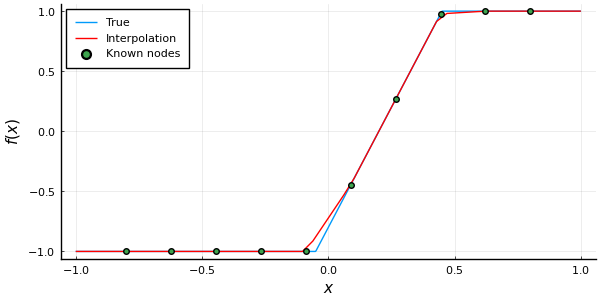

In [147]:
f_linear_func = LinearInterpolation(x_known,f_known,extrapolation_bc=Line())
f_linear_interp = f_linear_func.(G)

plot_interp(f_linear_interp)

#### (1) Cubic spline (use scipy.interpolate.CubicSpline)

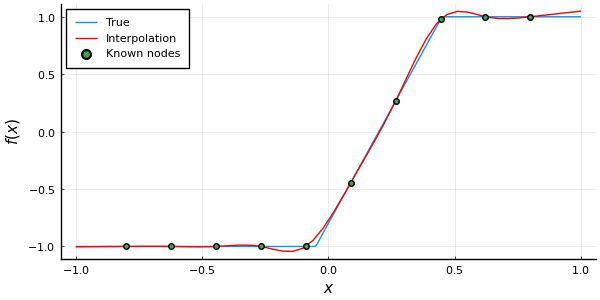

In [148]:
f_cubicSpine_func = CubicSplineInterpolation(x_known,f_known,extrapolation_bc=Line())

f_cubicSpine_interp = f_cubicSpine_func.(G)


plot_interp(f_cubicSpine_interp)


#### (2) Regression with regular polynomials of 4th order

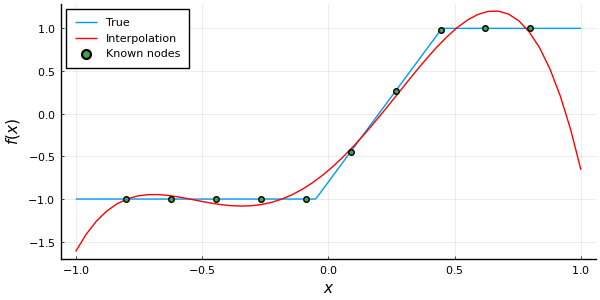

In [149]:
X = [x^i for  x in x_known, i in 0:4]

β = inv(X'*X)*(X'*f_known)

G_poly = [x^i for  x in G, i in 0:4]


f_reg_interp = G_poly*β

plot_interp(f_reg_interp)

In [150]:
using Polynomials 

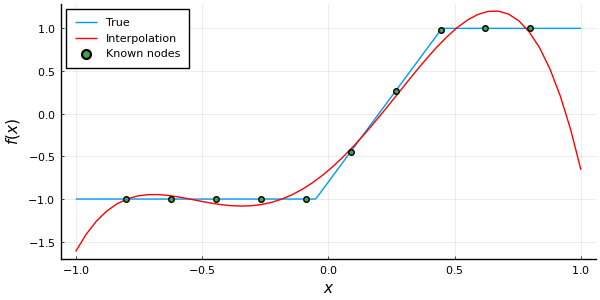

In [151]:
p = fit(x_known,f_known,4) # From poynomials
f_poly_fit_interp = p.(G)
plot_interp(f_poly_fit_interp)

#### (3) Regression with Chebyshev polynomials (see Chebyshev.py)

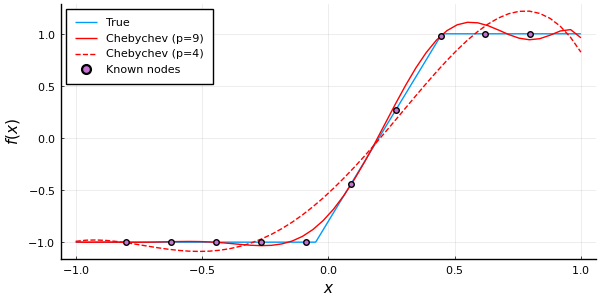

In [152]:
f_chebyshev_9,_,_ = Chebyshev.interpolation(f,G,N_known,9)
f_chebyshev_4,_,_ = Chebyshev.interpolation(f,G,N_known,4)


p = plot(x_true,f_true,label="True",size=(600,300))

plot!(p,G,f_chebyshev_9,color=:red,label="Chebychev (p=9)")
plot!(p,G,f_chebyshev_4,color=:red,label="Chebychev (p=4)",linestyle=:dash)

plot!(p,x_known,f_known,seriestype = :scatter,xlabel=L"x",ylabel=L"f(x)",label="Known nodes")
plot(p,legend=:topleft)


### Next consider the function
$$
g(x,z) = (x+1)^{0.4} \cdot (z+1)^{0.4} + \mathbb{1}_{zx>0.3}
$$

### 2. Use the ex ante code to investigate how large the error is from using linear interpolation

In [221]:
g(x,z) = ((x+1)^0.4)*((z+1)^0.4)+1*(z*x>0.3)



# Values for interpolation
N_true = 500
x_true = LinRange(0,1,N_true)
z_true = LinRange(0,1,N_true)
#x_true_mat, z_true_mat = np.meshgrid(x_true,z_true)
g_true = [ g(x,z) for x in x_true, z in z_true]
#g_true = g.(x_true,z_true)


# Known values
N_known = 20
x_known = LinRange(0,1,N_known)
z_known = LinRange(0,1,N_known)
#x_known_mat, z_known_mat = np.meshgrid(x_known,z_known)
g_known = [ g(x,z) for x in x_known, z in z_known] #Fill in


# Linear interpolation
g_func_interp =  LinearInterpolation( (x_known,z_known),g_known,extrapolation_bc=Line())

g_linear_interp = g_func_interp(x_true,z_true)

;

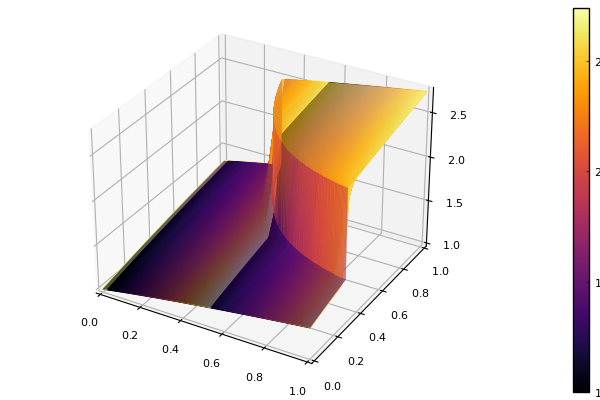

In [237]:
p1 = plot(x_true,z_true,g_true,st = :surface)
plot!(p1,x_true,z_true,g_linear_interp,st=:wireframe)

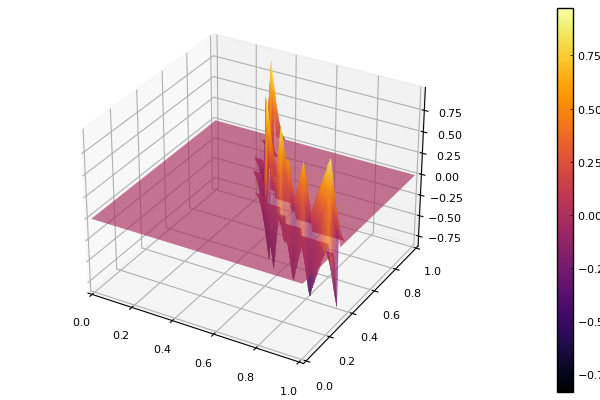

In [231]:
p2 = plot(x_true,z_true,g_true .- g_linear_interp,st = :surface)